In [91]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
import sklearn
%matplotlib inline

In [92]:
#read data into dataframe
data = pd.read_csv('C://Users//VISHAL//PycharmProjects//NeuralNetwork/testdata.csv')
print(data)
data.head()
print(data.keys())

     -6.57E-01  7.91E-01  0
0      2.12000 -0.000625  1
1     -0.90200  0.740000  0
2      0.52200  0.231000  0
3     -0.12700  0.036100  1
4      1.84000  0.587000  1
5      1.86000  0.299000  1
6      1.84000  0.232000  1
7      0.78900 -0.562000  1
8      0.20500  0.118000  1
9      0.98700  0.193000  0
10     0.69600  0.455000  0
11    -0.34700  0.947000  0
12     1.59000 -0.414000  1
13     1.74000 -0.019800  1
14     0.79300 -0.321000  1
15     0.88100  0.260000  0
16     0.17400  0.747000  0
17    -0.56300  0.671000  0
18     0.30700 -0.263000  1
19     0.80000  0.569000  0
20     0.44500  0.112000  1
21     0.69700  0.521000  0
22     0.66200  0.326000  0
23     1.52000 -0.479000  1
24     1.57000  0.013400  1
25     0.70100 -0.547000  1
26    -0.24700  0.068000  1
27     1.33000 -0.029700  1
28     0.27100 -0.260000  1
29     0.21400  0.843000  0
..         ...       ... ..
169   -0.63300  0.864000  0
170    0.27600  0.694000  0
171    0.95800  0.595000  0
172    1.06000  0.27

In [93]:
X = data.iloc[0:200, [0, 1]].values
y = data.iloc[0:200, 2].values

In [94]:
#Split the data into training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
#print(x_train)

In [95]:
#scikit learn BackPropagation model
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='lbfgs', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(x_train, np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 3), learning_rate='constant',
       learning_rate_init=0.1, max_iter=150, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [96]:
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

Training set score: 0.993711
Test set score: 0.950000


In [97]:
#Prdict the flower class 
predictions = mlp.predict(x_test)
predictions
#Accuracy score for the prediction 
print(accuracy_score(y_test,predictions))

0.95


In [98]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
  # print(X[:,0])
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  # print(xx1)
   #print(xx1)
   #print((np.array([xx1.ravel(), xx2.ravel()]).T))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
   Z = Z.reshape(xx1.shape)

   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   print(np.unique(y))

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      #print(idx)
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)
 

[0 1]


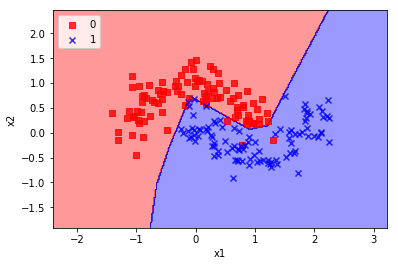

In [99]:
plot_decision_regions(X, y, classifier=mlp)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 